# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2019

Мягкий дедлайн: 07:59MSK 14.10.2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 16.10.2019

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

## Реализация градиентного спуска

Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью:

** Задание 1 (1 балл)** Градиентного спуска;

** Задание 2 (1.5 балла)** Стохастического градиентного спуска;

** Задание 3 (2.5 балла)** Метода Momentum.


Во всех пунктах необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускается использовать только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):

    * проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
    * достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).
* Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);
* Инициализировать веса можно случайным образом или нулевым вектором.


Ниже приведён шаблон класса, который должен содержать код реализации каждого из методов.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.linalg import norm
sns.set(style="darkgrid")

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

class LinearReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2, bath_size=1, b1=0.9, b2=0.999):
        """
        gd_type: 'full' or 'stochastic' or 'momentum' or 'mStochatic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.b1 = b1
        self.b2 = b2
        self.bath_size = bath_size


    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        self.w_history = []


        if self.w0 is None:
          self.w = np.random.uniform(-2, 2, X.shape[1])
        else:
          self.w = np.copy(np.array(self.w0))


        self.loss_history.append(self.calc_loss(X, y))

        d_w = np.zeros(X.shape[1])
        m_t = np.zeros(X.shape[1])
        v_t = np.zeros(X.shape[1])
        i = 1

        if self.gd_type == "full":
          while (i == 1) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            g = self.calc_gradient(X, y) / y.shape[0]
            d_w =  - self.eta * g
            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1



        elif self.gd_type == "stochastic":
          while (i == 1) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            sample = np.random.randint(X.shape[0], size=self.bath_size)
            g = self.calc_gradient(X[sample], y[sample]) / y.shape[0]

            d_w =  - self.eta * g
            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1



        elif self.gd_type == "momentum":

          while (i == 1) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            g = self.calc_gradient(X, y) / y.shape[0]
            d_w =  (- self.eta * g) + (d_w * self.alpha)
            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1




        elif self.gd_type == "Adam":
          while (i == 1 ) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            sample = np.random.randint(X.shape[0], size=self.bath_size)
            g = self.calc_gradient(X[sample], y[sample]) / y.shape[0]
            m_t = self.b1 * m_t + (1 - self.b1) * g
            v_t = self.b2 * v_t + (1 - self.b2) * np.power(g, 2)
            # данная процедура при нескольких первых итерациях рекомендуется
            # в некоторых источниках для более быстрого "разгона" параметр 10 был выбран эвристически.
            if i < 10:
              m_t_hat = m_t / (1 - np.power(self.b1, i))

            v_t_hat = v_t / (1 - np.power(self.b2, i))

            d_w =  - self.eta * m_t_hat / (np.sqrt(v_t_hat) + 1e-8)

            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1
            print(norm(d_w))
        else:
          print("You shall not past")


        return self


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return np.dot(X, self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        return  2  * np.dot(X.T, np.dot(X, self.w) - y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        return np.mean(np.power(np.dot(X, self.w) - y, 2))



** Задание 4 (0 баллов)**.
* Загрузите данные из домашнего задания 2 ([train.csv](https://www.kaggle.com/c/nyc-taxi-trip-duration/data));
* Разбейте выборку на обучающую и тестовую в отношении 7:3 с random_seed=0;
* Преобразуйте целевую переменную `trip_duration` как $\hat{y} = \log{(y + 1)}$.

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data.columns

Index([u'vendor_id', u'passenger_count', u'store_and_fwd_flag',
       u'trip_duration'],
      dtype='object')

In [ ]:
data.drop(["dropoff_datetime", "id"], axis=1, inplace=True)
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"]).astype(int) / 10 ** 15
data["vendor_id"] = data["vendor_id"] - 1
data["store_and_fwd_flag"] = data["store_and_fwd_flag"].replace({"N" : 0, "Y" : 1})
data["trip_duration"] = np.log1p(data["trip_duration"])

In [ ]:
data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,1457.976295,1,-73.982155,40.767937,-73.964630,40.765602,0,6.122493
1,0,1465.692215,1,-73.980415,40.738564,-73.999481,40.731152,0,6.498282
2,1,1453.203324,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661527
3,1,1459.971151,1,-74.010040,40.719971,-74.012268,40.706718,0,6.063785
4,1,1458.999055,1,-73.973053,40.793209,-73.972923,40.782520,0,6.077642


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, train_size=0.7, random_state=0)

In [ ]:
train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
430252,1,2,-73.934586,40.797016,-73.917397,40.834545,0,6.100319
598829,1,2,-73.957748,40.764500,-73.978706,40.758430,0,7.047517
314731,1,1,-73.982857,40.730961,-73.980171,40.734741,0,3.806662
1342009,1,1,-73.982262,40.771389,-73.979973,40.786072,0,5.783825
673814,0,1,-73.991264,40.749748,-73.976517,40.749260,0,6.084499


In [ ]:
X_train = train.drop("trip_duration", axis=1).values
X_test= test.drop("trip_duration", axis=1).values
y_train = train["trip_duration"].values
y_test = test["trip_duration"].values

** Задание 5 (3 балла)**. Обучите и провалидируйте модели на данных из предыдущего пункта, сравните качество между методами по метрикам MSE и $R^2$. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

При критически высоких значениях скорости обучения модель, вместо более быстрого схождения веса, расходятся -- коэффициенты становятся бесконечно большими. Для стохастического градиентного спуска критическим значением является eta порядка 1e+0, для полного стохастического спуска 1e-7, для momentum 1e-6. Стахастический градиентный спуск сходится быстро за порядка 10 итераций при eta порядка 1e-1 на обучающей выборке r2=-3, MSE=5,31. При 1e-2 веса сходятся медленне за 130 итераций, ограничение по количеству итераций меньше, чем 130 итераций снижает качество на валидационной выборке, что означает что модель не переобучается при данном пороге tolerance. При eta порядка 1e-3 и меньше стохастический алгоритм застревает в локальном минимуме. Аналогичные результаты получены и для других алгоритмов градиентного спуска. Momentum сходится при 15 итерациях при eta=1e-7 и alpha=1e-3 значение метрик качества: r2=-0.9111652767361251, MSE=1.2033618494738112. При alpha=1, валатильность весов слишком высока и модель не сходится, при более низких значениях масштаба alpha (<0.01) значения слишком малы что бы повлиять на результат.
Устанавливать более высокие значение максимального количества итераций в данном случае бессмыслено, так как при шаге, достаточно большом, что бы не застревать в локальном минимуме достаточно 1000 итераций.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
clf = LinearReg(gd_type='full', tolerance=1e-3, max_iter=1000, w0=None, alpha=1e-5, eta=1e-2, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

(-14564019.565973353, 9170209.890991079)

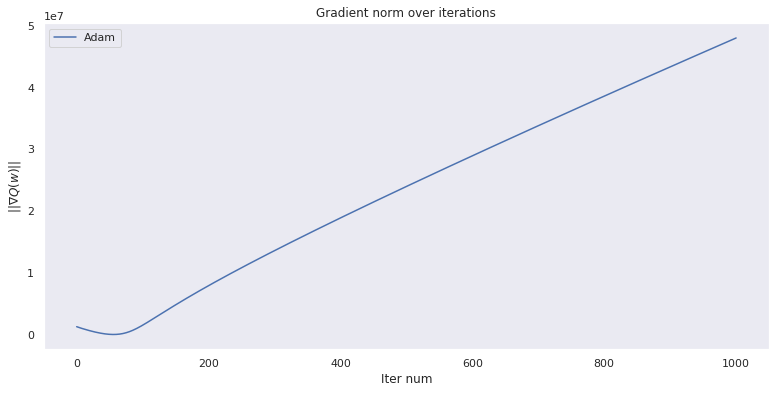

In [ ]:

plt.figure(figsize=(13, 6))
plt.plot(range(len(clf.loss_history)), clf.loss_history, label='Adam')


plt.title('Gradient norm over iterations')

plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'$||\nabla Q$($w$)||')
plt.grid()
plt.show()

** Задание 6 (2 балла)**. Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом Momentum. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны получиться *красивые* графики!

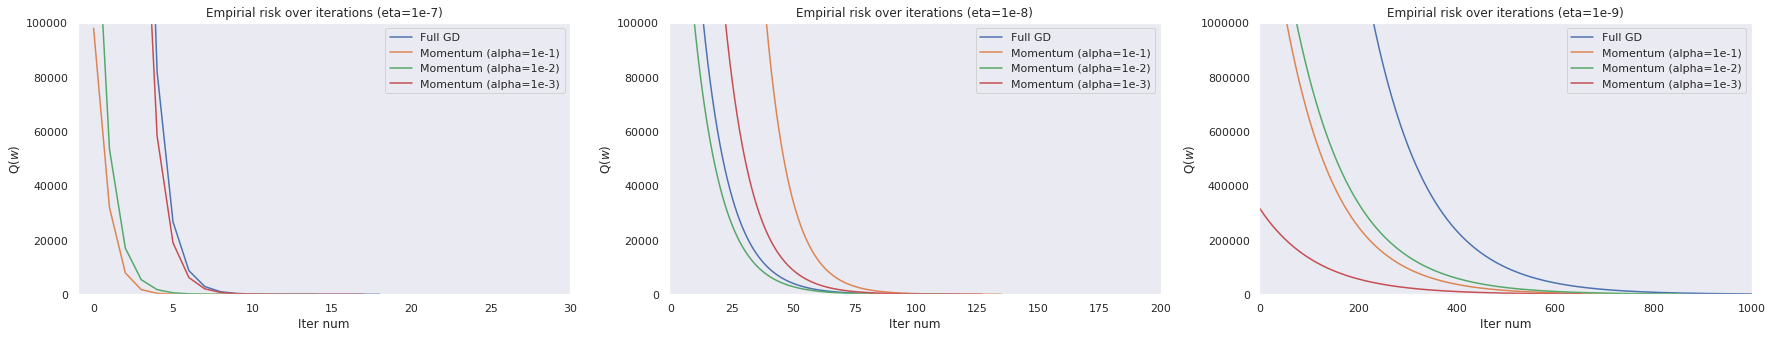

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (30, 5))


clf = LinearReg(gd_type='full', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-2, eta=1e-7, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[0].plot(range(len(clf.loss_history)), clf.loss_history, label='Full GD')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-1, eta=1e-7, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[0].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-1)')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-2, eta=1e-7, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[0].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-2)')



clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-7, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[0].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-3)')

axes[0].set_ylim((-1, 100000))
axes[0].set_xlim((-1, 30))
axes[0].legend()
axes[0].set_xlabel('Iter num')
axes[0].set_ylabel(r'Q($w$)')
axes[0].set_title('Empirial risk over iterations (eta=1e-7)')
axes[0].grid()

clf = LinearReg(gd_type='full', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-2, eta=1e-8, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[1].plot(range(len(clf.loss_history)), clf.loss_history, label='Full GD')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-1, eta=1e-8, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[1].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-1)')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-2, eta=1e-8, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[1].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-2)')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-8, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[1].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-3)')

axes[1].set_ylim((-1, 100000))
axes[1].set_xlim((-1, 200))
axes[1].legend()
axes[1].set_xlabel('Iter num')
axes[1].set_ylabel(r'Q($w$)')
axes[1].set_title('Empirial risk over iterations (eta=1e-8)')
axes[1].grid()

clf = LinearReg(gd_type='full', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-2, eta=1e-9, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[2].plot(range(len(clf.loss_history)), clf.loss_history, label='Full GD')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-1, eta=1e-9, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[2].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-1)')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-2, eta=1e-9, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[2].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-2)')

clf = LinearReg(gd_type='momentum', tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-9, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
axes[2].plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum (alpha=1e-3)')

axes[2].set_ylim((-1, 1000000))
axes[2].set_xlim((-1, 1000))
axes[2].legend()
axes[2].set_xlabel('Iter num')
axes[2].set_ylabel(r'Q($w$)')
axes[2].set_title('Empirial risk over iterations (eta=1e-9)')
axes[2].grid()



Наибольшая скорость схождения достигается при наибольшем возможном градиентном шаге, при котором значения не расходятся. Momentum сходится быстрее в Momentum при высоком уровне alpha, который ускоряет движение в сторону снижения градиента и может выбивать из небольших локальных минимумов, для продолжения движения к наилучшей комбинации весов.


### Бонус

** Задание 7 (2 балла)**. Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью метода
[Adam](https://arxiv.org/pdf/1412.6980.pdf) - добавьте при необходимости параметры в класс модели, повторите пункты 5 и 6 и сравните результаты.

0.00264574971053
0.0026414695484
0.0026295844415
0.00258182553739
0.00262453547607
0.00264728273237
0.00255518507508
0.00252645706377
0.00254903753204
0.00257016239719
0.00262033130217
0.00264054665887
0.00269473918782
0.00270095820422
0.00275620893209
0.00265209100933
0.00266447577568
0.00271290022996
0.00271646275005
0.00276769075194
0.002780585436
0.00278192236123
0.00283648738911
0.00289335017485
0.00290951494936
0.00292986958246
0.00291078126204
0.00286367759895
0.0028974119995
0.0029339914408
0.00299620613521
0.0030603297281
0.00305721990775
0.00302924281838
0.00304453911676
0.00306523611026
0.00297279291236
0.00297481911972
0.0030356549798
0.00310001069322
0.00308485448648
0.00315498834694
0.00319621155207
0.00315985803183
0.0031512905103
0.00315957733961
0.00292117172312
0.00295802530185
0.00293302226372
0.00292882401687
0.00296895580942
0.00302899960917
0.00304202574565
0.00302082275259
0.00301784632008
0.00307833082868
0.00314319054899
0.0032136596224
0.00328660855067
0.00332

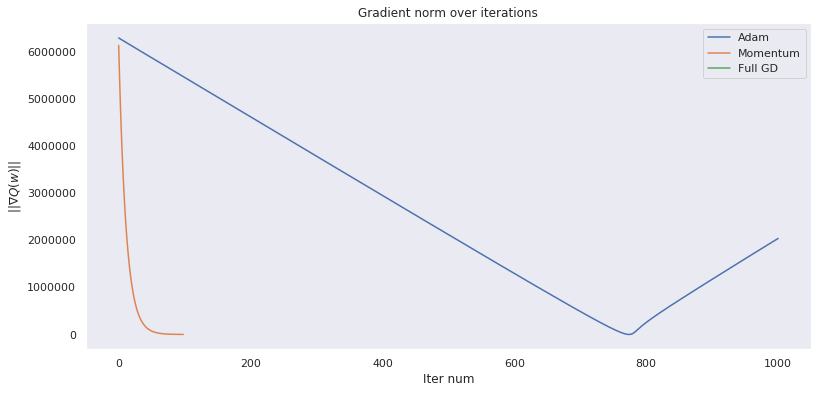

In [ ]:

plt.figure(figsize=(13, 6))
clf = LinearReg(gd_type='Adam', tolerance=1e-3, max_iter=1000, w0=None, alpha=1e-5, eta=1e-3, bath_size=1, b1=0.7, b2=0.9)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
plt.plot(range(len(clf.loss_history)), clf.loss_history, label='Adam')

clf = LinearReg(gd_type='momentum', tolerance=1e-3, max_iter=1000, w0=None, alpha=1e-2, eta=1e-8, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
plt.plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum')


plt.title('Gradient norm over iterations')

plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'$||\nabla Q$($w$)||')
plt.grid()
plt.show()

Adam - использует квадрат градиента для скалирования обучающего шага и, как и метод $momentum$ изменяет среднее значение градиента, а не сам градиент, что позволяет при стохастическом обучении учитывать общее направление градиента в течениеи последних итераций, а не только последней использованной подвыборки, что в теории позволят быстрее обучаться при сохранении обучающей способности. Но на данном наборе данных алгоритм из-за инерции выбивает себя из минимумов, в том числе и из  оптимального найденного минимума эмперической функции потерь.

** Задание 8 (2 балла)**. Реализуйте линейную регрессию с функцией потерь
$$ L(\hat{y}, y) = log(cosh(\hat{y} - y)),$$

обучаемую с помощью градиентного спуска.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

class my_LinearReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2, bath_size=1, b1=0.9, b2=0.999):
        """
        gd_type: 'full' or 'stochastic' or 'momentum' or 'mStochatic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.b1 = b1
        self.b2 = b2
        self.bath_size = bath_size


    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        self.w_history = []


        if self.w0 is None:
          self.w = np.random.uniform(-2, 2, X.shape[1])
        else:
          self.w = np.copy(np.array(self.w0))


        self.loss_history.append(self.calc_loss(X, y))

        d_w = np.zeros(X.shape[1])
        m_t = np.zeros(X.shape[1])
        v_t = np.zeros(X.shape[1])
        i = 1

        if self.gd_type == "full":
          while (i == 1) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            g = self.calc_gradient(X, y) / y.shape[0]
            d_w =  - self.eta * g
            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1
            print(norm(d_w))


        elif self.gd_type == "stochastic":
          while (i == 1) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            sample = np.random.randint(X.shape[0], size=self.bath_size)
            g = self.calc_gradient(X[sample], y[sample]) / y.shape[0]

            d_w =  - self.eta * g
            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1
            print(norm(d_w))


        elif self.gd_type == "momentum":

          while (i == 1) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            g = self.calc_gradient(X, y) / y.shape[0]
            d_w =  (- self.eta * g) + (d_w * self.alpha)
            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1
            print(norm(d_w))



        elif self.gd_type == "Adam":
          while (i == 1 ) or ((i <= self.max_iter) and (norm(d_w) > self.tolerance)):
            sample = np.random.randint(X.shape[0], size=self.bath_size)
            g = self.calc_gradient(X[sample], y[sample])
            m_t = self.b1 * m_t + (1 - self.b1) * g
            v_t = self.b2 * v_t + (1 - self.b2) * np.power(g, 2)
            # данная процедура при нескольких первых итерациях в некоторых источниках рекомендуется
            #для более быстрого "разгона" параметр 10 был выбран эвристически.
            if i < 10:
              m_t_hat = m_t / (1 - np.power(self.b1, i))

            v_t_hat = v_t / (1 - np.power(self.b2, i))

            d_w =  - self.eta * m_t_hat / (np.sqrt(v_t_hat) + 1e-8)

            self.w += d_w
            self.loss_history.append(self.calc_loss(X, y))

            i += 1
            print(norm(d_w))
        else:
          print("You shall not past")


        return self


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return np.dot(X, self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        return  np.dot(X.T, np.tanh(np.dot(X, self.w) - y)) / y.shape[0]


    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        return np.mean(np.log(np.cosh(np.dot(X, self.w) - y)))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: overflow encountered in cosh


0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.109340151181
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.14643872049
0.146

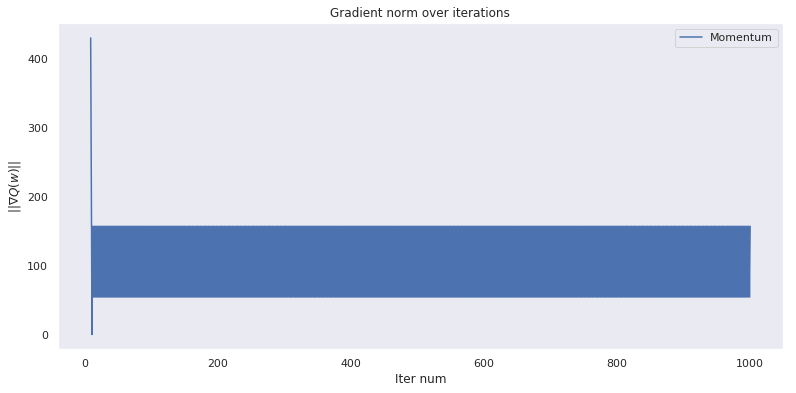

In [ ]:

plt.figure(figsize=(13, 6))
clf = my_LinearReg(gd_type='full', tolerance=1e-3, max_iter=1000, w0=None, alpha=1e-2, eta=1e-5, bath_size=1)
clf.fit(X_train, y_train) #'full' or 'stochastic' or 'momentum' or 'mStochastic'
plt.plot(range(len(clf.loss_history)), clf.loss_history, label='Momentum')

plt.title('Gradient norm over iterations')

plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'$||\nabla Q$($w$)||')
plt.grid()
plt.show()




** Задание 9 (0.01 балла)**.  Вставьте картинку с вашим любимым мемом в этот Jupyter Notebook

<img src="https://7zabav.club/wp-content/uploads/2019/03/mem_pikachu_36_09065715-600x360.jpg" width="50%" align="right" style="margin-left: 20px">